In [2]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Inputing the data
df = pd.read_csv('airbnb_2.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.value_counts('neighbourhood_group')

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
dtype: int64

<AxesSubplot:>

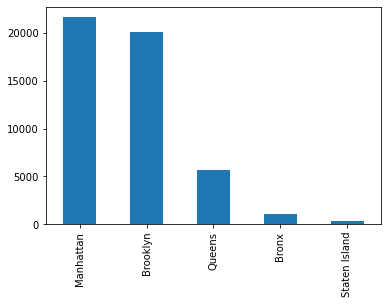

In [16]:
df['neighbourhood_group'].value_counts().plot(kind='bar')

In [17]:
df.value_counts('neighbourhood_group', normalize=True)

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
dtype: float64

In [18]:
#Creating a calculated field
df['Revenues'] = df['price']*df['number_of_reviews']

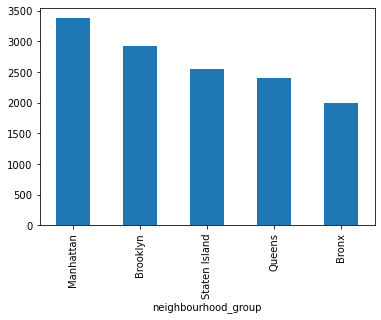

In [19]:
# Compare the counts bar graph above with the revenue graph below
df.groupby("neighbourhood_group").mean()['Revenues'].sort_values(ascending=False).plot(kind='bar')
plt.show()

In [20]:
#Comparing individual neighbourhoods within three specific groups
condition = df['neighbourhood_group'].isin(['Manhattan','Brooklyn','Queens'])

In [21]:
MBQ = df[condition]

In [22]:
revenue = MBQ.groupby(['neighbourhood_group', 'neighbourhood'])['Revenues'].sum().sort_values(ascending=False).reset_index()

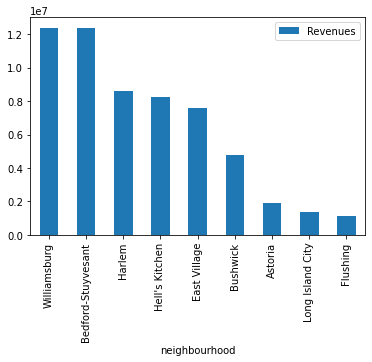

In [23]:
grouped_df = revenue.groupby('neighbourhood_group').head(3)
grouped_df.groupby('neighbourhood').sum().sort_values(by='Revenues', ascending=False).plot(kind='bar')
plt.show()

In [24]:
top9 = list(grouped_df['neighbourhood'])
top9

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 "Hell's Kitchen",
 'East Village',
 'Bushwick',
 'Astoria',
 'Long Island City',
 'Flushing']

In [25]:
# Looking at revenues for different room types in the top 9 neighbourhoods
top9df = df[df['neighbourhood'].isin(top9)] #You are returning a Boolean Matrix here, not a Dataframe. 
top9df 
room_revenues = top9df.groupby(['neighbourhood', 'room_type'])['Revenues'].mean().reset_index()
print(room_revenues)

         neighbourhood        room_type     Revenues
0              Astoria  Entire home/apt  2845.629921
1              Astoria     Private room  1549.394737
2              Astoria      Shared room  1250.160000
3   Bedford-Stuyvesant  Entire home/apt  5923.995600
4   Bedford-Stuyvesant     Private room  1409.256624
5   Bedford-Stuyvesant      Shared room   650.764706
6             Bushwick  Entire home/apt  4128.241888
7             Bushwick     Private room  1124.728912
8             Bushwick      Shared room   439.220588
9         East Village  Entire home/apt  4871.841880
10        East Village     Private room  2796.284848
11        East Village      Shared room  1257.913043
12            Flushing  Entire home/apt  4879.349057
13            Flushing     Private room  2027.403909
14            Flushing      Shared room    63.538462
15              Harlem  Entire home/apt  4991.899614
16              Harlem     Private room  2132.832804
17              Harlem      Shared room  1472.

In [26]:
room_revenues['neighbourhood_room_type'] = room_revenues['neighbourhood'] + ', ' + room_revenues['room_type']
room_revenues

,neighbourhood,room_type,Revenues,neighbourhood_room_type
0,Astoria,Entire home/apt,2845.629921,"Astoria, Entire home/apt"
1,Astoria,Private room,1549.394737,"Astoria, Private room"
2,Astoria,Shared room,1250.160000,"Astoria, Shared room"
3,Bedford-Stuyvesant,Entire home/apt,5923.995600,"Bedford-Stuyvesant, Entire home/apt"
4,Bedford-Stuyvesant,Private room,1409.256624,"Bedford-Stuyvesant, Private room"
5,Bedford-Stuyvesant,Shared room,650.764706,"Bedford-Stuyvesant, Shared room"
6,Bushwick,Entire home/apt,4128.241888,"Bushwick, Entire home/apt"
7,Bushwick,Private room,1124.728912,"Bushwick, Private room"
8,Bushwick,Shared room,439.220588,"Bushwick, Shared room"
9,East Village,Entire home/apt,4871.841880,"East Village, Entire home/apt"


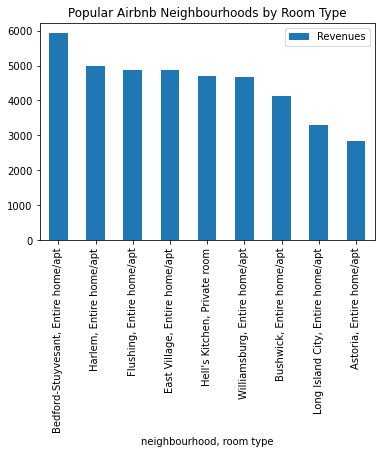

In [28]:
room_revenues_sorted = room_revenues.sort_values(by='Revenues', ascending = False)
room_revenues_distinct = room_revenues_sorted.drop_duplicates(subset = ['neighbourhood'])
top9types = room_revenues_distinct.head(9)
indexed9types = top9types.set_index('neighbourhood_room_type')
indexed9types.plot(kind='bar')
plt.xlabel('neighbourhood, room type')
plt.title('Popular Airbnb Neighbourhoods by Room Type')
plt.show()